# MANOJ.S 
#FIFA data set analysis of performance of the Players
#The 2019 FIFA Club World Cup was the 16th edition of the FIFA Club World Cup, a FIFA-organised international club football tournament between the winners of the six continental confederations, as well as the host nation's league champions. The tournament was hosted by Qatar between 11 and 21 December 2019, taking place at two venues in Doha.

In [1]:
# lets import basic libraries
# basic operations
import numpy as np

In [2]:
# for dataframe manipulation
import pandas as pd

In [3]:
# for data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# for date time manipulations
import datetime

In [5]:
#for missing values
import missingno as mno

In [6]:
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [7]:
# setting up the background style for plots
plt.style.use('fivethirtyeight')

# READING DATA

In [8]:
# reading the data and also checking the computation time 
%time df=pd.read_csv('fifa.csv')

CPU times: total: 516 ms
Wall time: 2.16 s


In [9]:
df=pd.read_csv('fifa.csv')

In [10]:
# lets check the type of data
type(df)

pandas.core.frame.DataFrame

In [11]:
# lets also check the shape of the dataset
print(df.shape)

(18207, 89)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [13]:
# lets check the column names present in the data 
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [14]:
# lets check the first 5 rows and columns
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [15]:
df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [16]:
# lets describe the data for the numerical columns
df.iloc[:,2:].describe().style.background_gradient(cmap='cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [17]:
# lets check the describe statistics for the categorical columns as well
df.iloc[:,13:].describe(include='object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,...,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,...,660,660,660,713,669,634,634,634,669,557


# CLEANING DATA

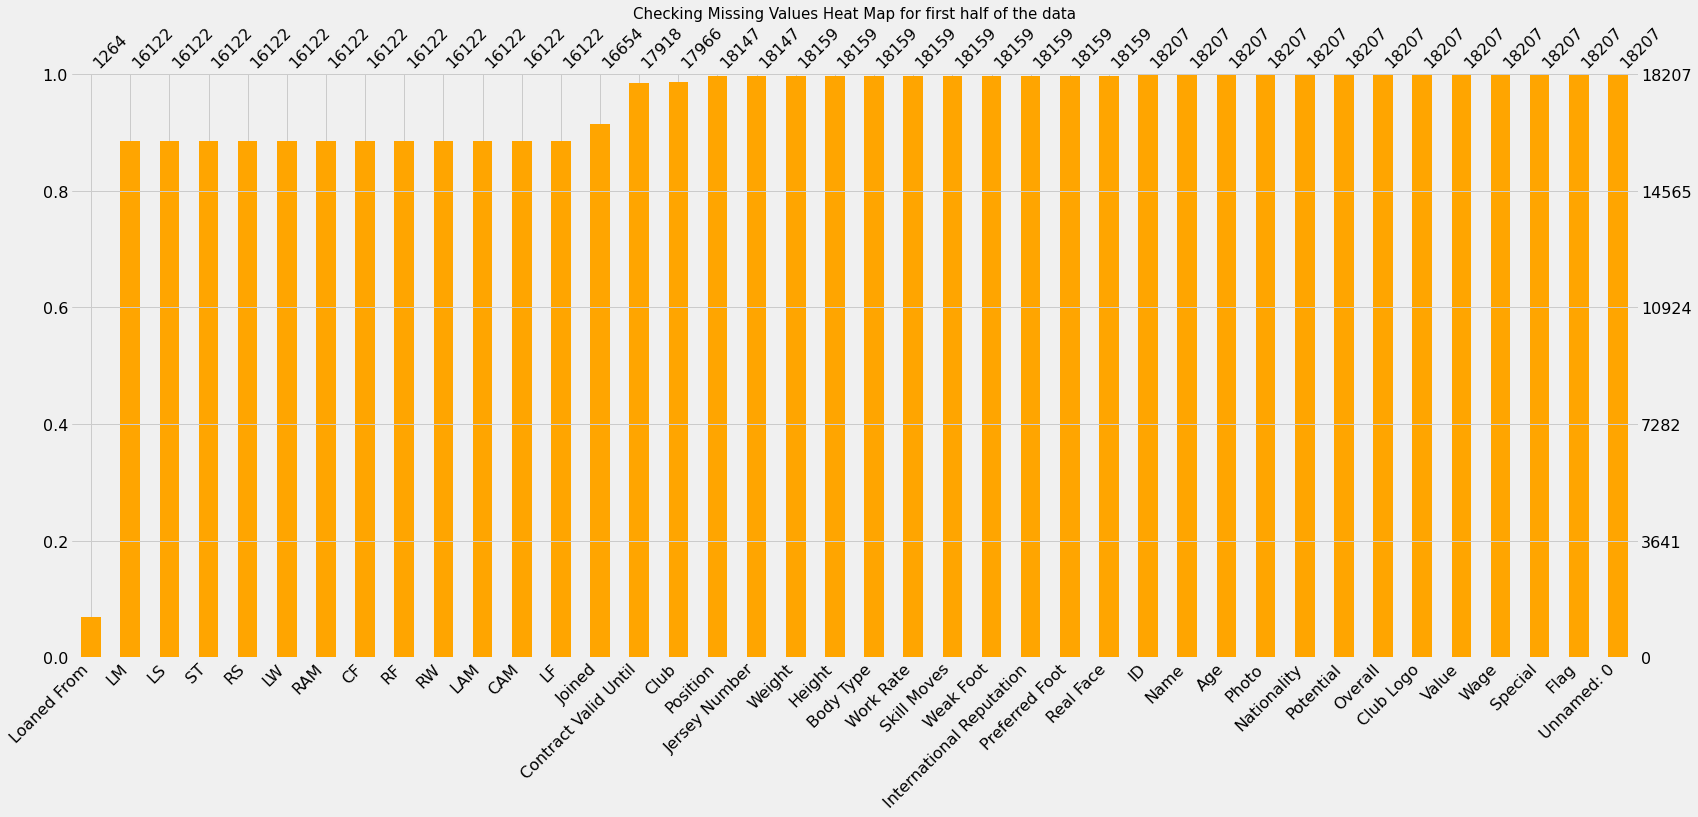

In [18]:
# checking if the data contains any null values
# visualise the missing values as a matrix
mno.bar(df.iloc[:,:40],
       color='orange',
       sort='ascending')
plt.title('Checking Missing Values Heat Map for first half of the data',fontsize=15)
plt.show()

<AxesSubplot:>

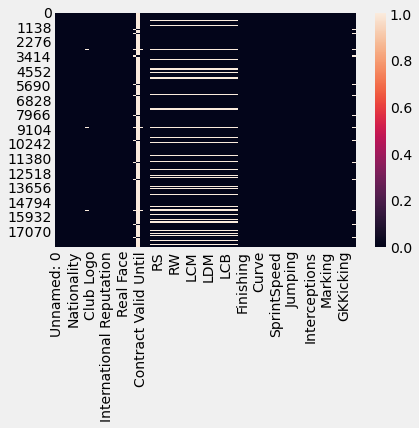

In [19]:
sns.heatmap(df.isna())

In [44]:
df.isnull().sum().sum()

0

In [20]:
df.isna().sum().head(40)

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [21]:
df.isna().sum().tail(39)

LCB                2085
CB                 2085
RCB                2085
RB                 2085
Crossing             48
Finishing            48
HeadingAccuracy      48
ShortPassing         48
Volleys              48
Dribbling            48
Curve                48
FKAccuracy           48
LongPassing          48
BallControl          48
Acceleration         48
SprintSpeed          48
Agility              48
Reactions            48
Balance              48
ShotPower            48
Jumping              48
Stamina              48
Strength             48
LongShots            48
Aggression           48
Interceptions        48
Positioning          48
Vision               48
Penalties            48
Composure            48
Marking              48
StandingTackle       48
SlidingTackle        48
GKDiving             48
GKHandling           48
GKKicking            48
GKPositioning        48
GKReflexes           48
Release Clause     1564
dtype: int64

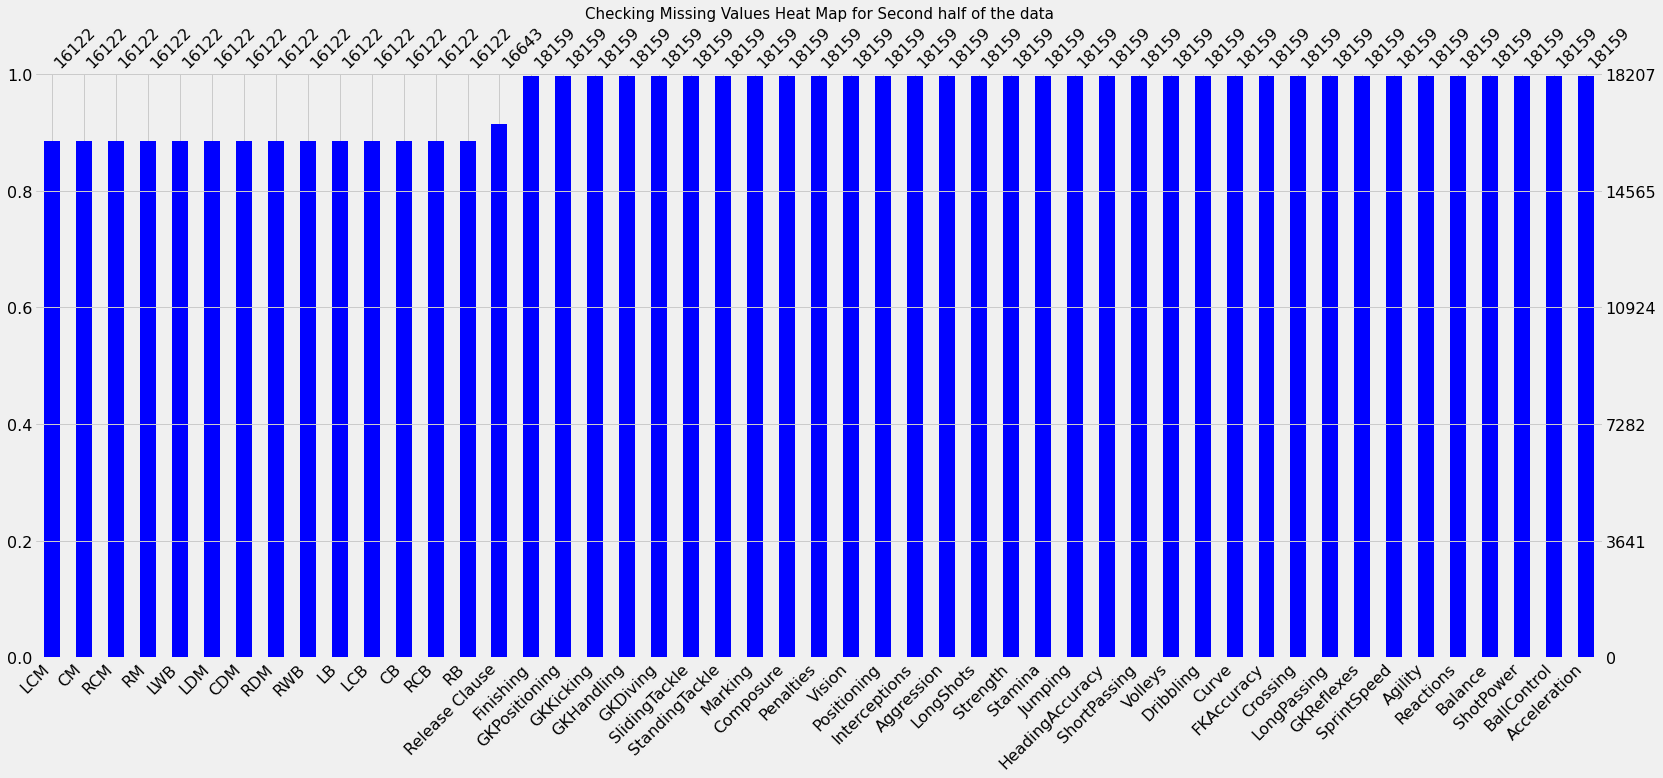

In [22]:
mno.bar(df.iloc[:,40:],
       color='blue',
       sort='ascending')
plt.title('Checking Missing Values Heat Map for Second half of the data',fontsize=15)
plt.show()

# MISSING VALUES IMPUTATION

In [23]:
# filling the missing values for the continuous variables for proper data visualisation
df['Club'].fillna('No Club',inplace=True)
df['Loaned From'].fillna('none',inplace=True)
df['Joined'].fillna('Jul,1,2018',inplace=True)
df['Contract Valid Until'].fillna(2019,inplace=True)
df['Position'].fillna('ST',inplace=True)
df['Jersey Number'].fillna(8,inplace=True)
df['Height'].fillna("5'11",inplace=True)
df['Weight'].fillna('200lbs',inplace=True)
df['Body Type'].fillna('Normal',inplace=True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(),inplace=True)
df['Volleys'].fillna(df['Volleys'].mean(),inplace=True)
df['Dribbling'].fillna(df['Dribbling'].mean(),inplace=True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(),inplace=True)
df['Curve'].fillna(df['Curve'].mean(),inplace=True)
df['LongPassing'].fillna(df['LongPassing'].mean(),inplace=True)
df['BallControl'].fillna(df['BallControl'].mean(),inplace=True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(),inplace=True)
df['Finishing'].fillna(df['Finishing'].mean(),inplace=True)
df['Crossing'].fillna(df['Crossing'].mean(),inplace=True)
df['Work Rate'].fillna('Medium/Medium',inplace=True)
df['Skill Moves'].fillna(df['Skill Moves'].median(),inplace=True)
df['Weak Foot'].fillna(3,inplace=True)
df['Preferred Foot'].fillna('Right',inplace=True)
df['International Reputation'].fillna(1,inplace=True)
df['Wage'].fillna('€200k',inplace=True)
df.fillna(0,inplace=True)

In [24]:
# lets check whether the data still has any missing values
df.isna().sum().sum()

0

# FEATURE ENGINEERING

In [25]:
# creating new features by aggregating the features
def defending(df):
    return int(round((df[['Marking','StandingTackle','SlidingTackle']].mean()).mean()))

def general(df):
    return int(round((df[['HeadingAccuracy','Dribbling','Curve','BallControl']].mean()).mean()))

def mental(df):
    return int(round((df[['Aggression','Interceptions','Positioning']].mean()).mean()))

def passing(df):
    return int(round((df[['Crossing','ShortPassing','LongPassing']].mean()).mean()))

def mobility(df):
    return int(round((df[['Acceleration','SprintSpeed','Agility','Reactions']].mean()).mean()))

def power(df):
    return int(round((df[['Balance','Jumping','Stamina','Strength']].mean()).mean()))

def rating(df):
    return int(round((df[['Potential','Overall']].mean()).mean()))

def shooting(df):
    return int(round((df[['Finishing','Volleys','FKAccuracy','ShotPower','LongShots','Penalties']].mean()).mean()))

In [26]:
#adding these categories to data
df['Defending']= df.apply(defending,axis=1)
df['General']= df.apply(general,axis=1)
df['Mental']= df.apply(mental,axis=1)
df['Passing']= df.apply(passing,axis=1)
df['Mobility']= df.apply(mobility,axis=1)
df['Power']= df.apply(power,axis=1)
df['Rating']= df.apply(rating,axis=1)
df['Shooting']= df.apply(shooting,axis=1)

In [27]:
#lets check the column names in the data after adding new feautures
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [28]:
df.shape

(18207, 97)

# DATA VISUALISATION

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

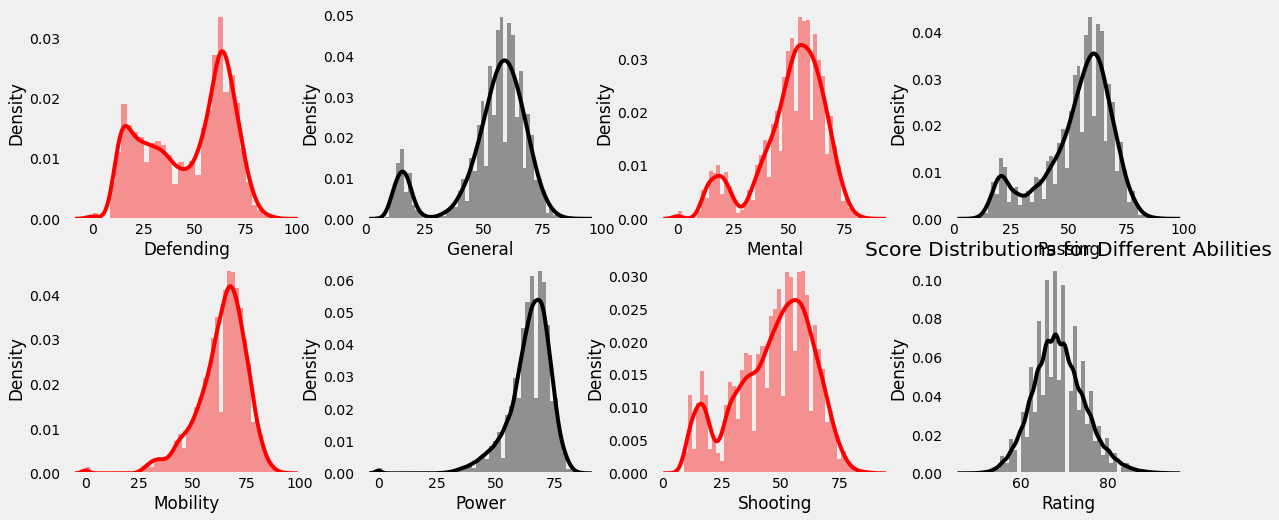

In [29]:
# lets check the distribution of scores of different skills
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,1)
sns.distplot(df['Defending'],color='red')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['General'],color='black')
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['Mental'],color='red')
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['Passing'],color='black')
plt.grid()
plt.subplot(2,4,5)
sns.distplot(df['Mobility'],color='red')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['Power'],color='black')
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['Shooting'],color='red')
plt.grid()

plt.subplot(2,4,8)
sns.distplot(df['Rating'],color='black')
plt.grid()

plt.title('Score Distributions for Different Abilities')
plt.show()
import warnings
warnings.filterwarnings("ignore")

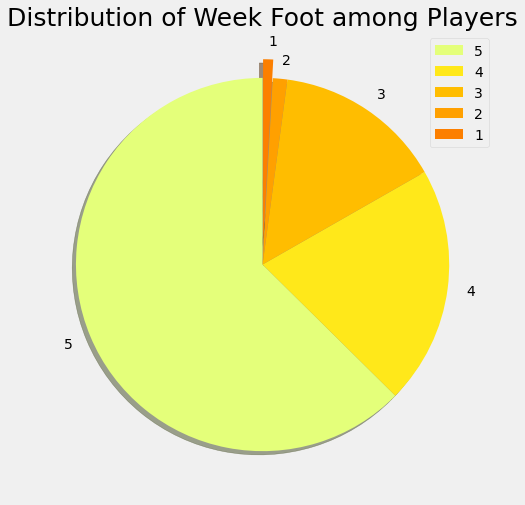

In [30]:
# plotting a pie chart to represent the share of week foot players
labels=['5','4','3','2','1']
sizes=df['Weak Foot'].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,5))
explode=[0,0,0,0,0.1]

plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title('Distribution of Week Foot among Players',fontsize=25)
plt.legend()
plt.show()


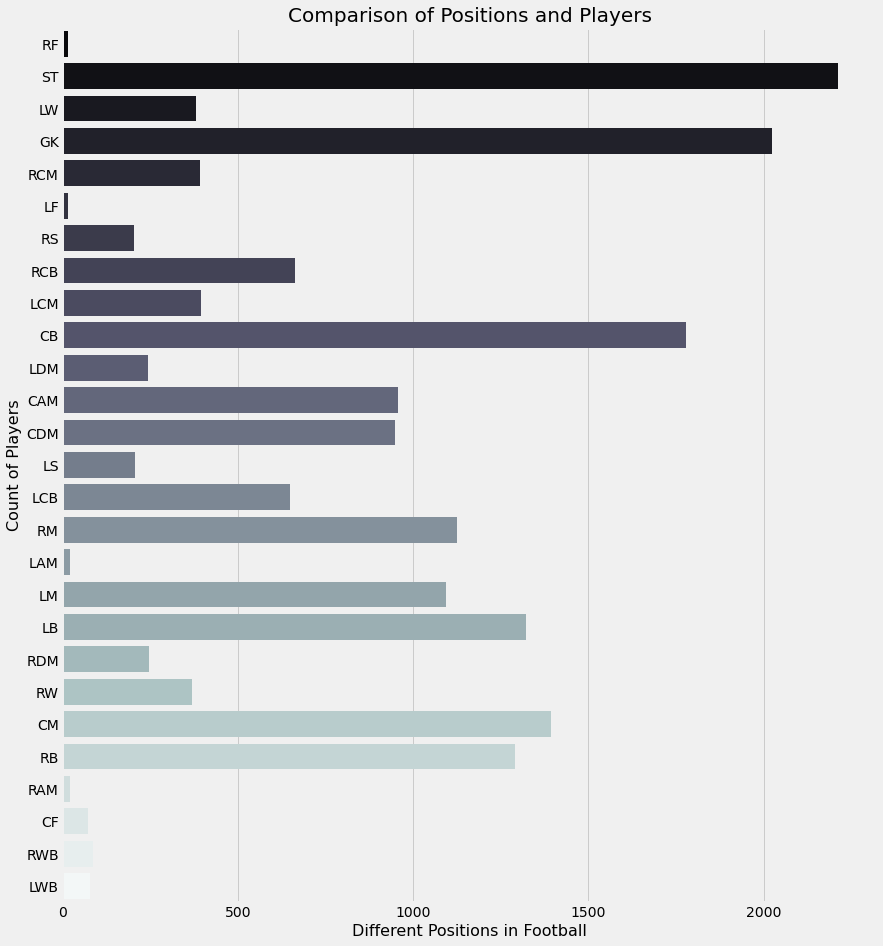

In [31]:
# different positions acquired by the players
plt.figure(figsize=(13,15))
plt.style.use('fivethirtyeight')
ax=sns.countplot(y='Position',data=df,palette='bone')
ax.set_xlabel(xlabel='Different Positions in Football',fontsize=16)
ax.set_ylabel(ylabel='Count of Players',fontsize=16)
ax.set_title(label='Comparison of Positions and Players',fontsize=20)
plt.show()

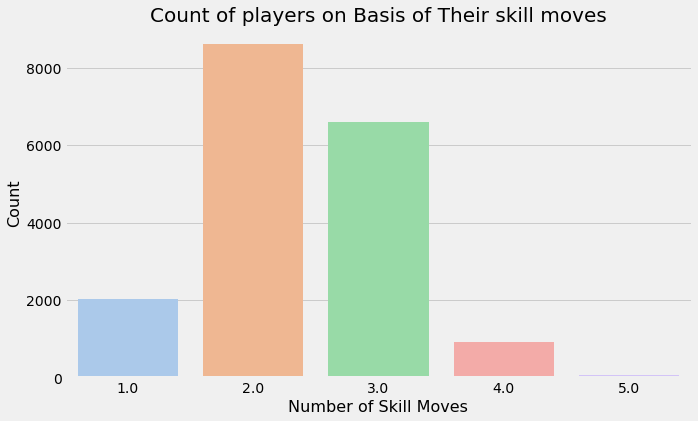

In [33]:
# skill moves of players
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Skill Moves',data=df,palette='pastel')
ax.set_title(label='Count of players on Basis of Their skill moves',fontsize=20)
ax.set_xlabel(xlabel='Number of Skill Moves',fontsize=16)
ax.set_ylabel(ylabel='Count',fontsize=16)
plt.show()

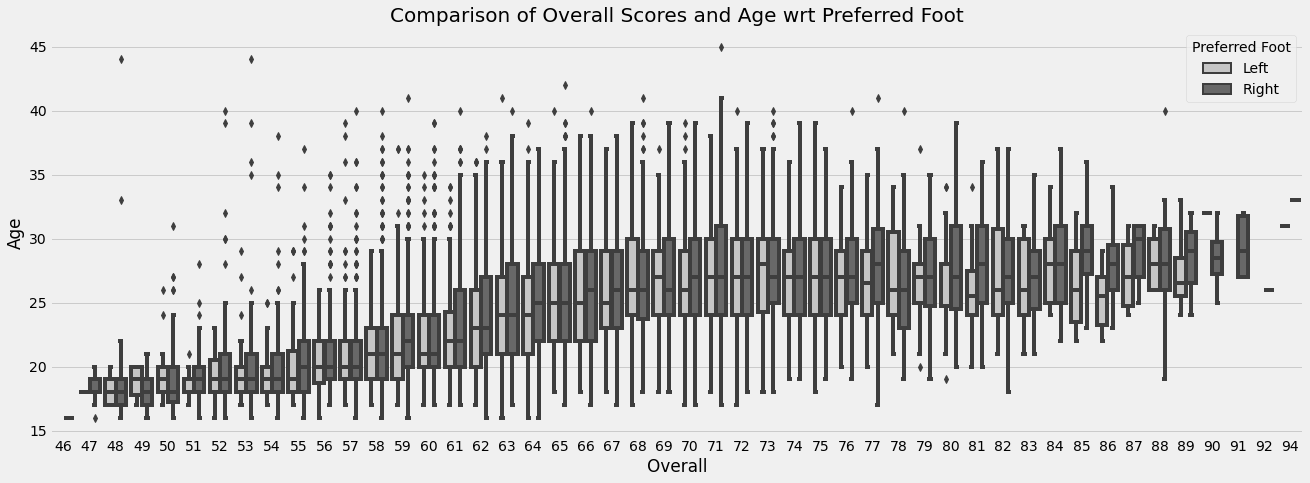

In [34]:
# box plot
plt.rcParams['figure.figsize']=(20,7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(df['Overall'],df['Age'],hue=df['Preferred Foot'],palette='Greys')
plt.title(label='Comparison of Overall Scores and Age wrt Preferred Foot',fontsize=20)
plt.show()
import warnings
warnings.filterwarnings("ignore")

# COUNTRIES WITH MOST PLAYERS

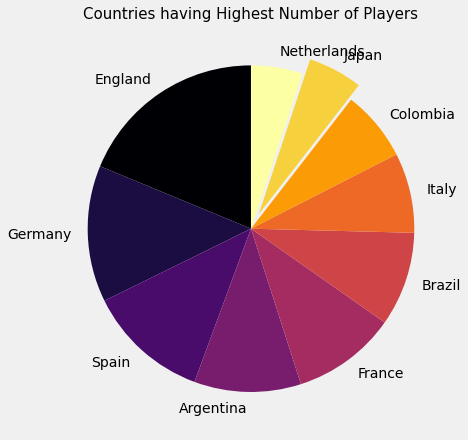

In [35]:
# picking up the countries with highest number of players to compare their overall scores
df['Nationality'].value_counts().head(10).plot(kind='pie',cmap='inferno',startangle=90,explode=[0,0,0,0,0,0,0,0,0.1,0])
plt.title('Countries having Highest Number of Players',fontsize=15)
plt.axis('off')
plt.show()

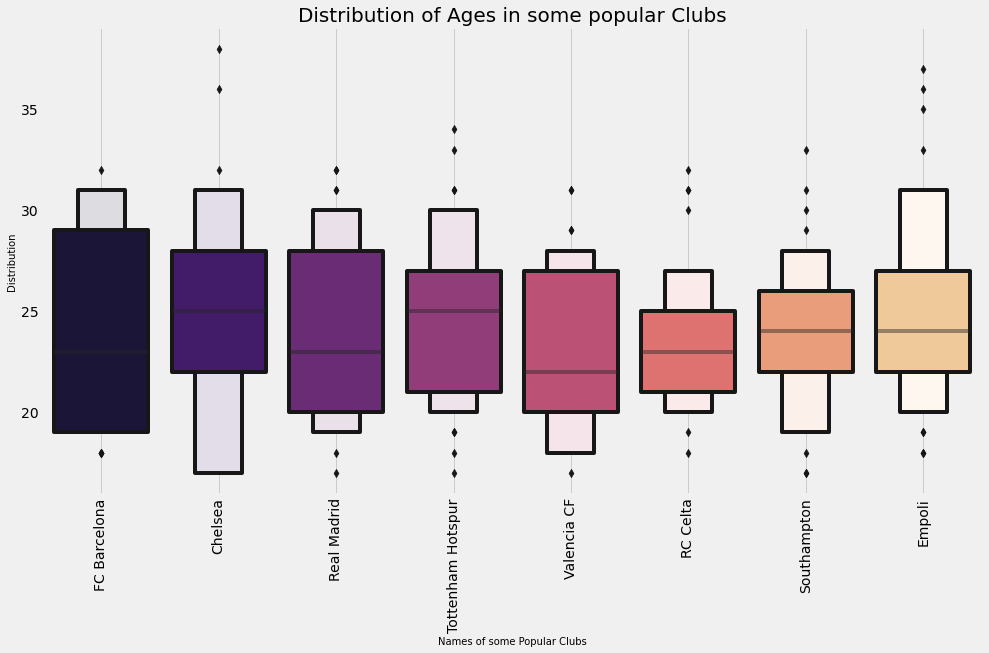

In [36]:
# distribution of ages in some popular clubs
some_clubs=('CD Legends','Southampton','RC Celta','Empoli','Fortuna Dusseldorf','Manchestar City','Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','Real Madrid')
data_clubs=df.loc[df['Club'].isin(some_clubs) & df['Wage']]

plt.rcParams['figure.figsize']=(15,8)
ax=sns.boxenplot(x='Club',y='Age',data=data_clubs,palette='magma')
ax.set_xlabel(xlabel='Names of some Popular Clubs',fontsize=10)
ax.set_ylabel(ylabel='Distribution',fontsize=10)
ax.set_title(label='Distribution of Ages in some popular Clubs',fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [37]:
# distributing of wages in some popular clubs
some_clubs=('CD Legends','Southampton','RC Celta','Empoli','Fortuna Dusseldorf','Manchestar City','Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','Real Madrid')
data_clubs=df.loc[df['Club'].isin(some_clubs) & df['Wage']]

plt.rcParams['figure.figsize']=(16,8)
ax=sns.boxenplot(x='Club',y='Wage',data=data_clubs,palette='magma')
ax.set_xlabel(xlabel='Names of some Popular Clubs',fontsize=10)
ax.set_ylabel(ylabel='Distribution',fontsize=10)
ax.set_title(label='Distribution of Wages in some popular Clubs',fontsize=20)
plt.xticks(rotation=90)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbling
sns.lmplot(x='BallControl',y='Dribbling',data=df,col='Preferred Foot')
plt.show()

# Best players for each skill


In [ ]:
#let's analyse the skills of players

@interact
def skill(skills=['Defending','General','Mental','Passing','Mobility','Power','Rating','Shooting'],score=75):
    return df[df[skills]>score][['Name','Nationality','Club','Overall',skills]].sort_values(by=skills,ascending=False).head(20).style.background_gradient(cmap='Blues')

In [38]:
#youngest players from the fifa 2019
#finding 15 youngest players from the dataset
youngest=df[df['Age']==16][['Name','Age','Club','Nationality','Overall']]
youngest.sort_values(by='Overall',ascending=False).head().style.background_gradient(cmap='magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


In [39]:
# finding 15 eldest players from fifa 2019
df.sort_values('Age',ascending=False)[['Name','Age','Club','Nationality','Overall']].head(15).style.background_gradient(cmap='Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [40]:
# top 10 left footed footballers
df[df['Preferred Foot']=='Left'][['Name','Age','Club','Nationality','Overall']].sort_values(by='Overall',ascending=False).head(10).style.background_gradient(cmap='bone')

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


In [41]:
# top 10 right footed players
df[df['Preferred Foot']=='Right'][['Name','Age','Club','Nationality','Overall']].sort_values(by='Overall',ascending=False).head(10).style.background_gradient(cmap='copper')

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


ValueError: could not convert string to float: '€110.5M'

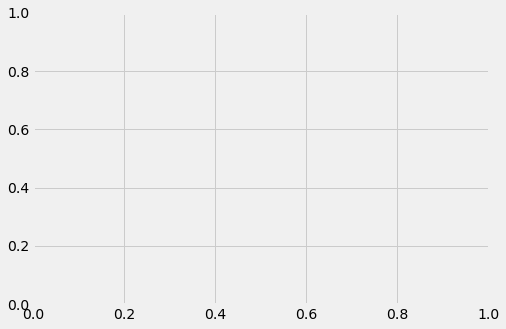

In [42]:
# visualising the data
plt.rcParams['figure.figsize']=(16,5)
plt.subplot(1,2,1)
sns.distplot(df['Value'],color='violet')
plt.title('Distribution of Value of the Players',fontsize=15)

plt.subplot(1,2,2)
sns.distplot(df['Wage'],color='purple')
plt.title('Distribution of Wages of the Players',fontsize=15)
plt.show()
import warnings
warnings.filterwarnings("ignore")